In [21]:
%load_ext autoreload
%autoreload 2
% pylab inline

pylab.rcParams['figure.figsize'] = (15, 6)

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import seaborn as sns

sns.set_style("darkgrid")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


 /Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning:pylab import has clobbered these variables: ['multivariate_normal', 'f', 'vectorize', 'plot']
`%matplotlib` prevents importing * from pylab and numpy


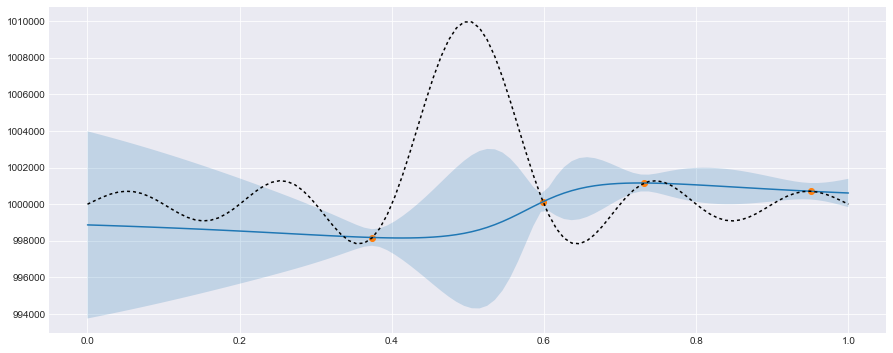

In [31]:
from src.bo import *
from src.dngo import *
from src.acquisition_functions import EI, UCB

def f(x):
    return np.sinc(x * 10 - 5).sum(axis=1)[:, None] * 10000 +1000000

rng = np.random.RandomState(42)
x_train = rng.uniform(0, 1, 4)[:, None]
y_train = f(x_train)

################

nn = TFModel(input_dim=1, dim_basis=50, epochs=100, batch_size=10)
reg = BayesianLinearRegression(num_mcmc=0, burn_in=1000, mcmc_steps=1000)
model = BOModel(nn, regressor=reg)
model.init(x_train, y_train)

x = (np.linspace(0, 1, 100))[:,None]
y = f(x)
model.plot_prediction(x,y)

... starting round 0 / 20


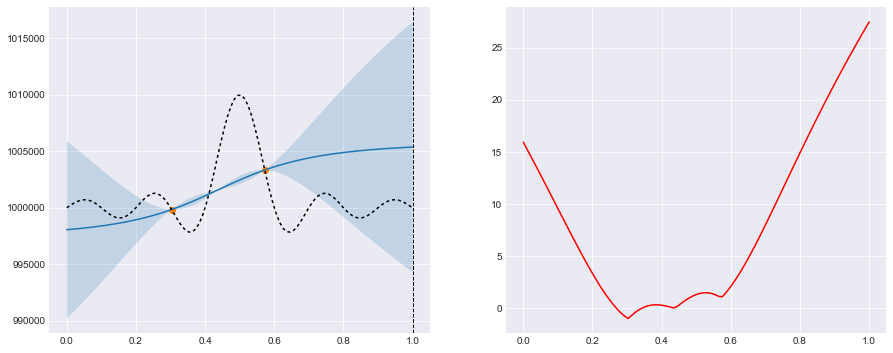

... starting round 1 / 20


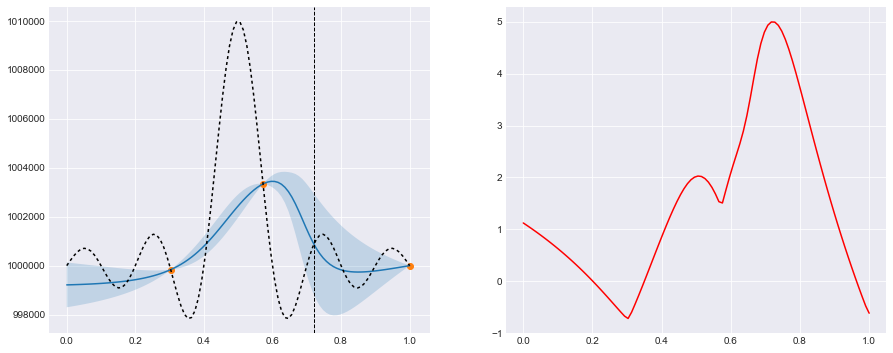

... starting round 2 / 20


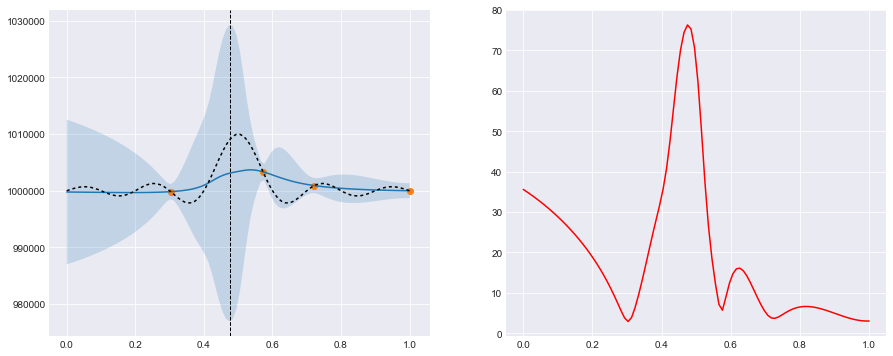

... starting round 3 / 20


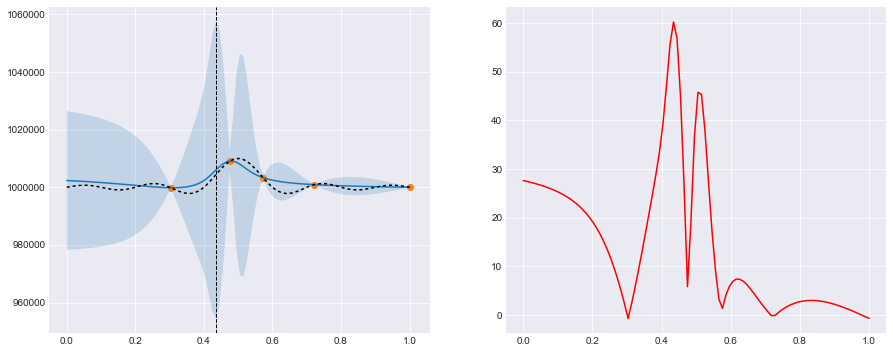

... starting round 4 / 20


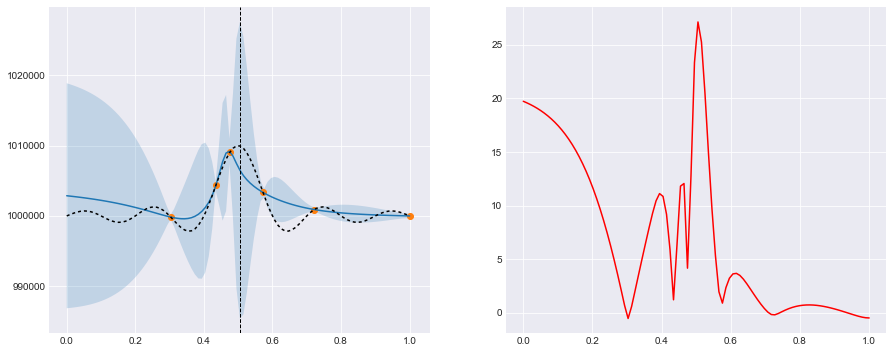

... starting round 5 / 20


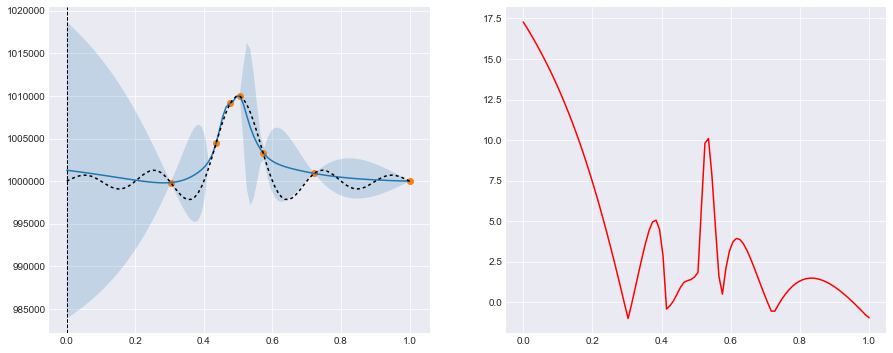

... starting round 6 / 20


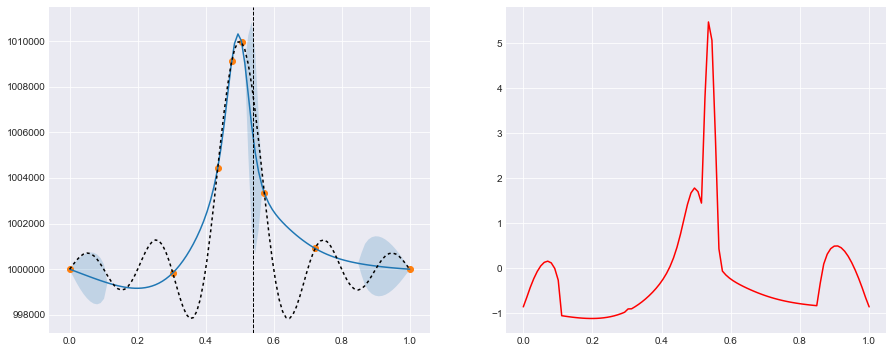

... starting round 7 / 20


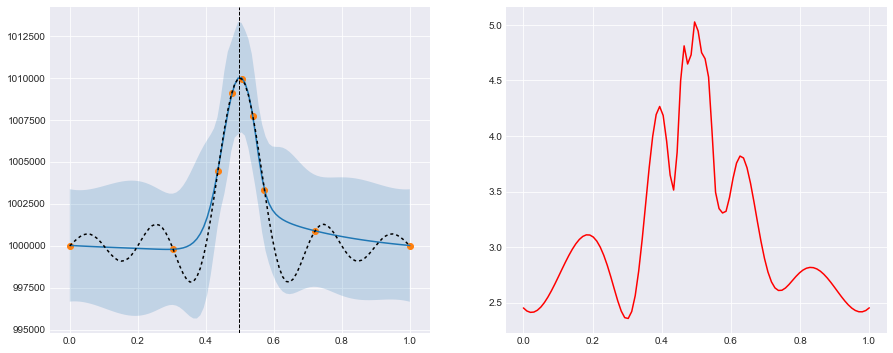

... starting round 8 / 20


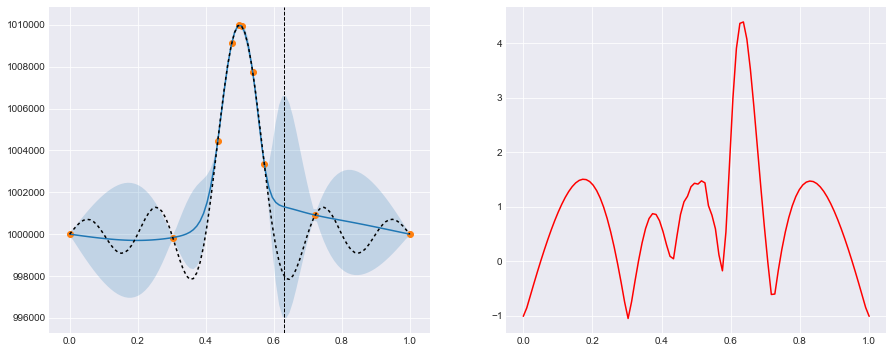

... starting round 9 / 20


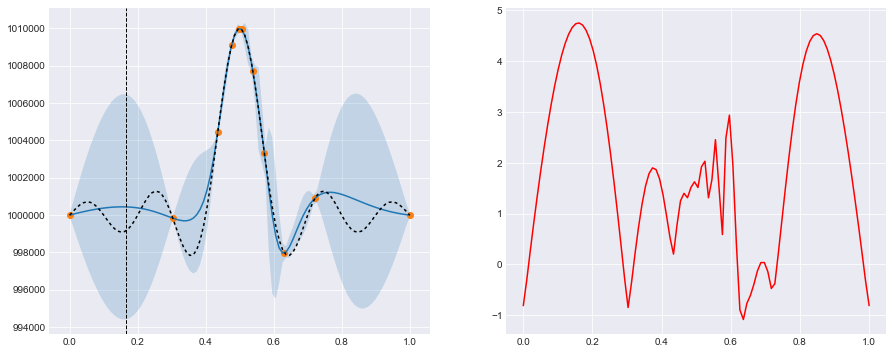

... starting round 10 / 20


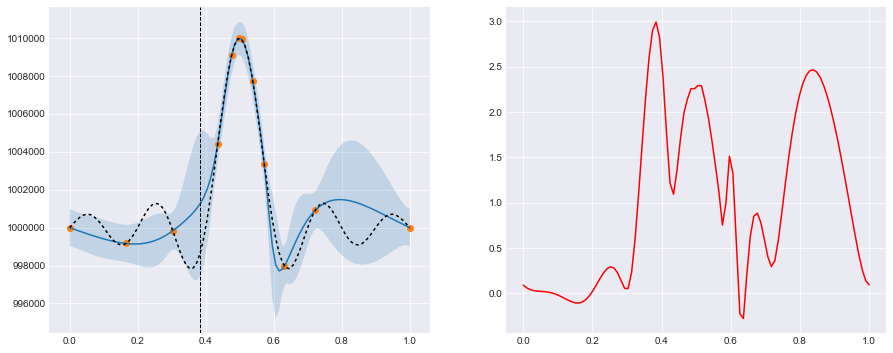

... starting round 11 / 20


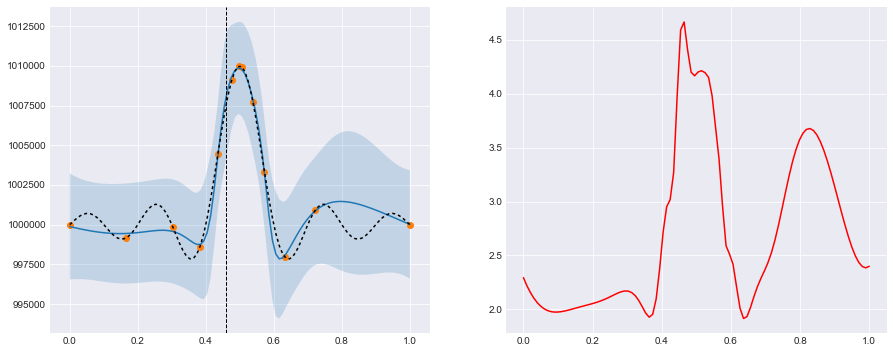

... starting round 12 / 20


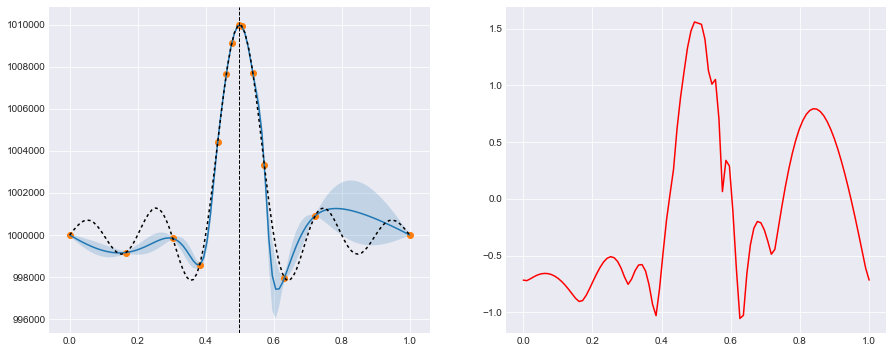

... starting round 13 / 20


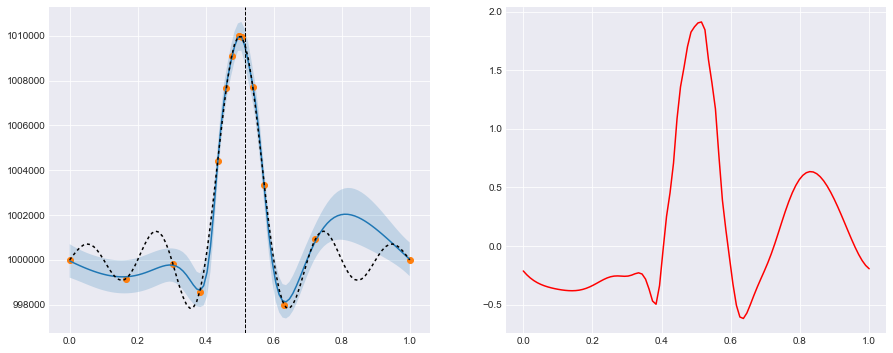

... starting round 14 / 20


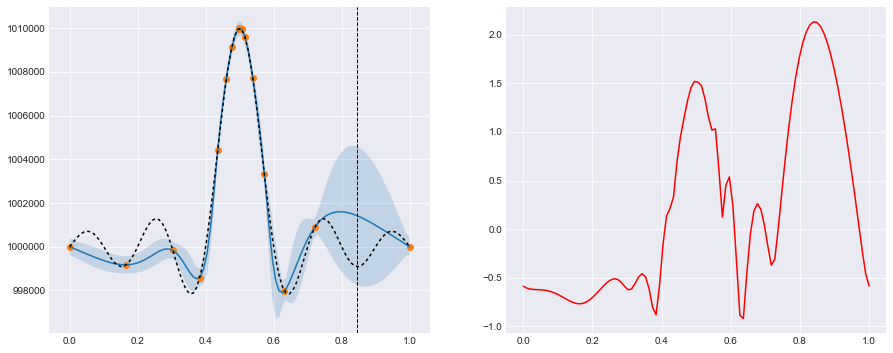

... starting round 15 / 20


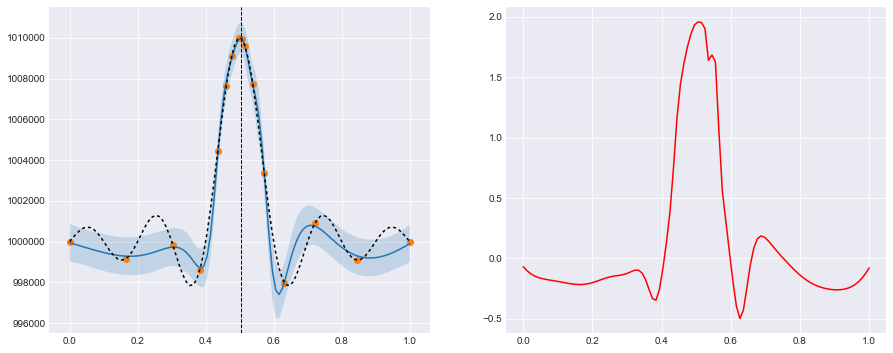

... starting round 16 / 20


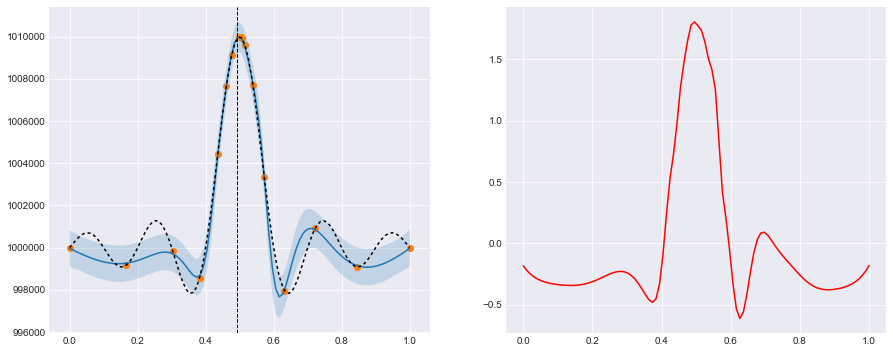

... starting round 17 / 20


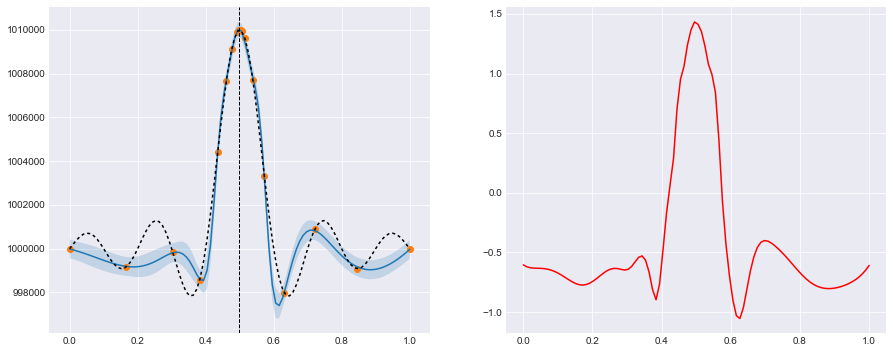

... starting round 18 / 20


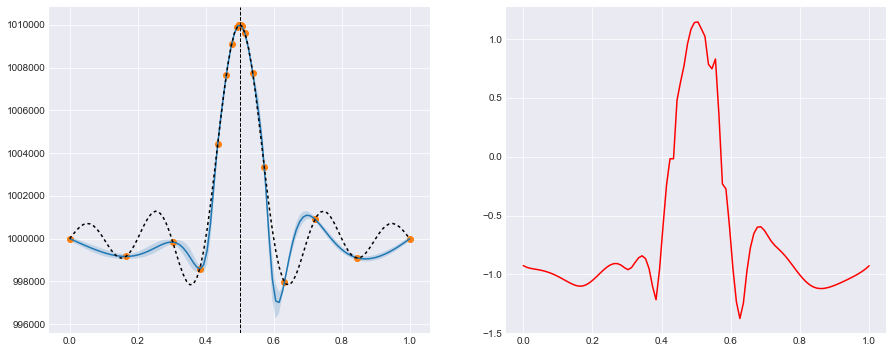

... starting round 19 / 20


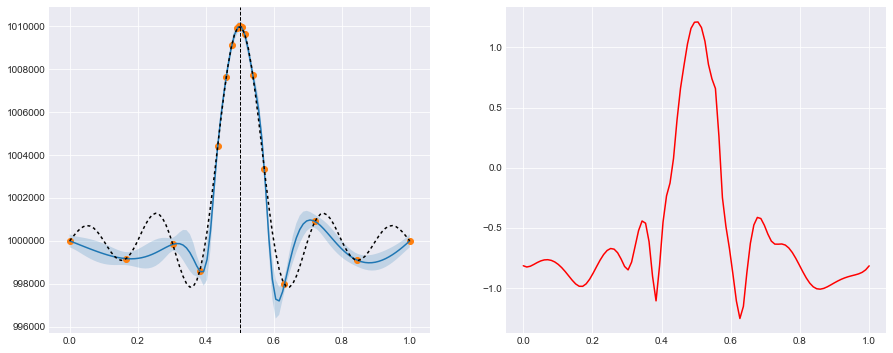

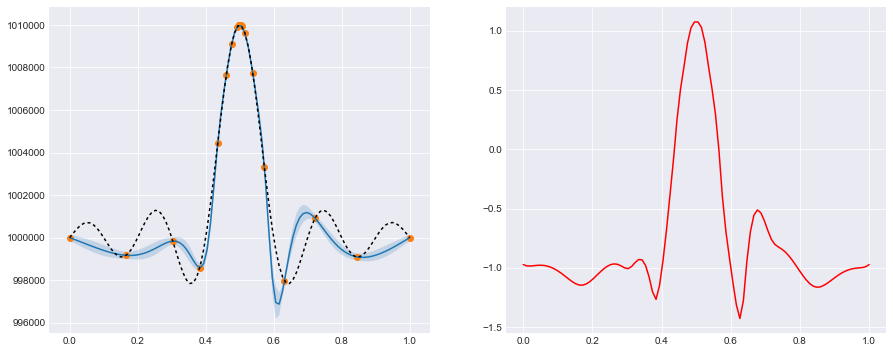

In [32]:
# acq = EI(model, par=0.01)
acq = UCB(model)
bo = BO(f, model, acquisition_function=acq, n_iter=20, bounds=np.array([[0,1]]))
bo.run()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
... starting round 0 / 3


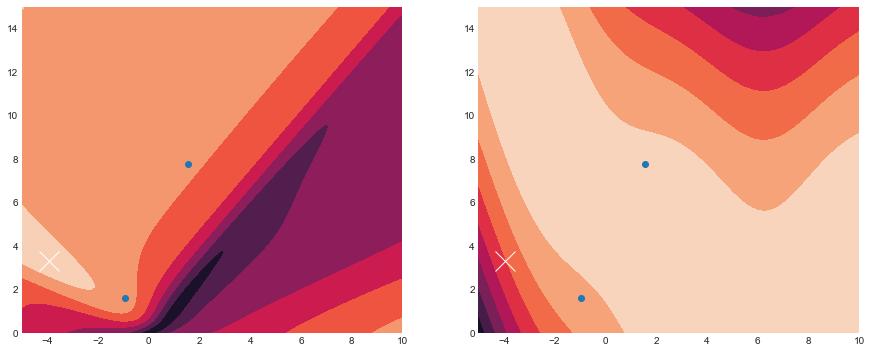

... starting round 1 / 3


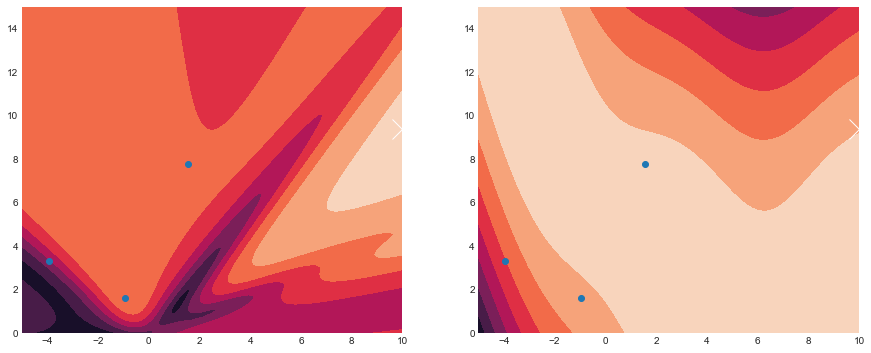

... starting round 2 / 3


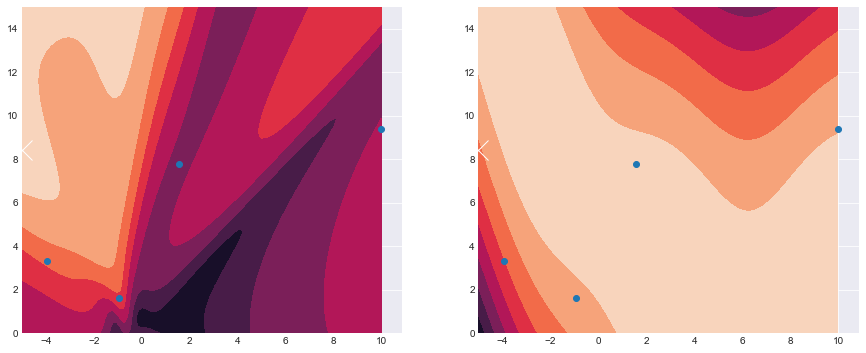

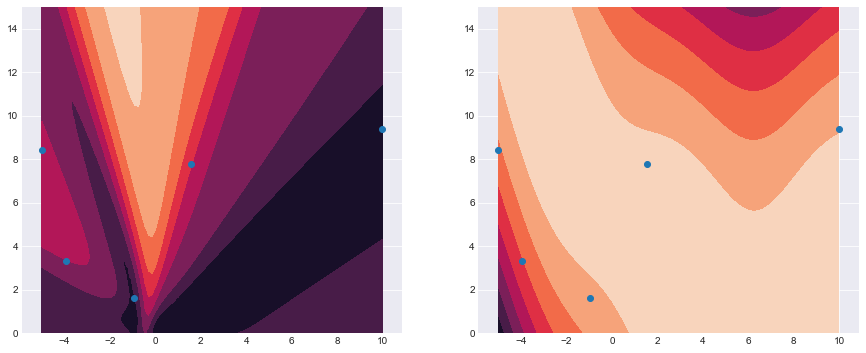

In [26]:
%load_ext autoreload
%autoreload 2
from src.tests import *
from hpolib.benchmarks.synthetic_functions import Branin
f, bounds, f_opt = prepare_benchmark(Branin())

boo = test_dngo_10_10_10_pe(f, bounds, 3, do_plot=True)

In [10]:
import tensorflow as tf
boo.model.sess = tf.Session()
self = boo.model
self.nn_model.fit(self.sess, self.X, self.Y)
self.D = self.nn_model.predict_basis(self.sess, self.X)
self.gp.fit(self.D, self.nn_model.y)
fig = boo.plot_2D_surface(use_plotly=True)
iplot(fig)

This is the format of your plot grid:
[ (1,1) scene1 ]  [ (1,2) scene2 ]
[ (2,1) scene3 ]  [ (2,2) scene4 ]



In [1]:
from src.tests import *

import pathos.multiprocessing as mp

from hpolib.benchmarks.synthetic_functions import Branin
f, bounds, f_opt = prepare_benchmark(Branin())

pool = mp.Pool()
n_iter = 200
result1 = pool.apply_async(test_random_sample, [f, bounds, n_iter])
result2 = pool.apply_async(test_dngo_50_50_50_pe, [f, bounds, n_iter])
result3 = pool.apply_async(test_dngo_10_10_10_pe, [f, bounds, n_iter])
result4 = pool.apply_async(test_dngo_50_50_50_marg, [f, bounds, n_iter])
rand_arg_his, rand_f_his = result1.get()
bo2 = result2.get()
bo3 = result3.get()
bo4 = result4.get()

plot_ir([
    acc_ir(rand_f_his, f_opt),
    acc_ir(bo2.model.Y, f_opt), 
    acc_ir(bo3.model.Y, f_opt), 
    acc_ir(bo4.model.Y, f_opt),
])
plt.show()

 /Users/tmpethick/GoogleDrive/dtu/8-5-ETH-summer/eth-project/src/priors.py:24: RuntimeWarning:divide by zero encountered in log


... starting round 0 / 200
... starting round 0 / 200


 /Users/tmpethick/GoogleDrive/dtu/8-5-ETH-summer/eth-project/src/priors.py:24: RuntimeWarning:overflow encountered in exp
 /Users/tmpethick/GoogleDrive/dtu/8-5-ETH-summer/eth-project/src/priors.py:24: RuntimeWarning:divide by zero encountered in double_scalars
 /Users/tmpethick/GoogleDrive/dtu/8-5-ETH-summer/eth-project/src/priors.py:24: RuntimeWarning:overflow encountered in double_scalars
 /Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/emcee/ensemble.py:335: RuntimeWarning:invalid value encountered in subtract
 /Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/emcee/ensemble.py:336: RuntimeWarning:invalid value encountered in greater


... starting round 1 / 200
... starting round 1 / 200
... starting round 2 / 200
... starting round 2 / 200
... starting round 3 / 200
... starting round 3 / 200
... starting round 4 / 200
... starting round 4 / 200
... starting round 5 / 200
... starting round 5 / 200


 /Users/tmpethick/GoogleDrive/dtu/8-5-ETH-summer/eth-project/src/priors.py:24: RuntimeWarning:divide by zero encountered in log
 /Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/scipy/optimize/optimize.py:563: RuntimeWarning:invalid value encountered in subtract


... starting round 6 / 200


 /Users/tmpethick/GoogleDrive/dtu/8-5-ETH-summer/eth-project/src/priors.py:24: RuntimeWarning:divide by zero encountered in log
 /Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/scipy/optimize/optimize.py:563: RuntimeWarning:invalid value encountered in subtract


... starting round 6 / 200
... starting round 7 / 200
... starting round 8 / 200
... starting round 7 / 200
... starting round 9 / 200
... starting round 8 / 200
... starting round 10 / 200
... starting round 9 / 200
... starting round 11 / 200
... starting round 10 / 200
... starting round 12 / 200
... starting round 11 / 200
... starting round 13 / 200
... starting round 12 / 200
... starting round 14 / 200
... starting round 13 / 200
... starting round 15 / 200
... starting round 14 / 200
... starting round 16 / 200
... starting round 15 / 200
... starting round 17 / 200
... starting round 16 / 200
... starting round 18 / 200
... starting round 17 / 200
... starting round 0 / 200
... starting round 19 / 200
... starting round 18 / 200
... starting round 20 / 200
... starting round 19 / 200
... starting round 21 / 200
... starting round 20 / 200
... starting round 22 / 200
... starting round 21 / 200
... starting round 23 / 200
... starting round 22 / 200
... starting round 24 / 200


<Figure size 640x480 with 1 Axes>

Process ForkPoolWorker-4:
Traceback (most recent call last):
Process ForkPoolWorker-3:
  File "/Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/multiprocess/process.py", line 258, in _bootstrap
    self.run()
Process ForkPoolWorker-2:
  File "/Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/multiprocess/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/multiprocess/pool.py", line 108, in worker
    task = get()
  File "/Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/multiprocess/queues.py", line 337, in get
    with self._rlock:
  File "/Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/multiprocess/synchronize.py", line 102, in __enter__
    return self._semlock.__enter__()
Traceback (most recent call last):
KeyboardInterrupt
  File "/Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/multiprocess/process.py", line 258,

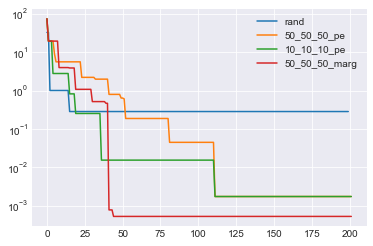

In [7]:
import seaborn as sns

sns.set_style("darkgrid")

plot_ir([
    acc_ir(rand_f_his, f_opt),
    acc_ir(bo2.model.Y, f_opt), 
    acc_ir(bo3.model.Y, f_opt), 
    acc_ir(bo4.model.Y, f_opt),
])
plt.legend(["rand", "50_50_50_pe", "10_10_10_pe", "50_50_50_marg"])
plt.show()

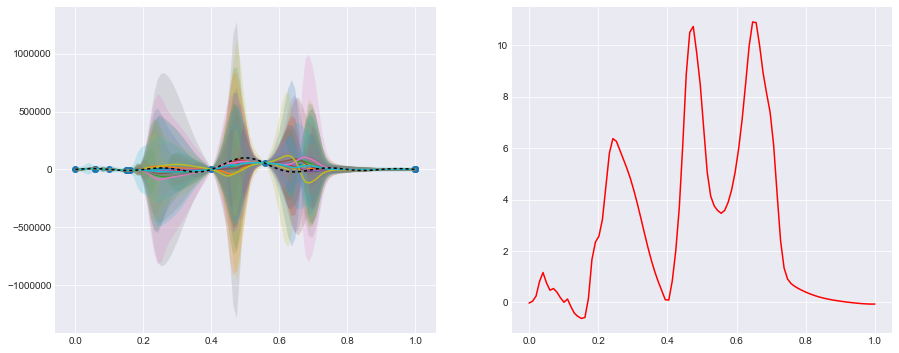

In [15]:
bo.plot_prediction()